<center><h1>KIM_GUKIL_HW1</h1></center>
<br>
<center><font size="4">Vertebral Column Data</font></center>

### (a) Download Data

Package imports

In [133]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.metrics as metrics
from scipy.io import arff

Get the Vertebral Column Data Set

In [110]:
data = arff.loadarff('./VC_DATA/column_2C_weka.arff')
df = pd.DataFrame(data[0])
df.head()
df.describe()

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
count        310.000000   310.000000             310.000000    310.000000   
mean          60.496653    17.542822              51.930930     42.953831   
std           17.236520    10.008330              18.554064     13.423102   
min           26.147921    -6.554948              14.000000     13.366931   
25%           46.430294    10.667069              37.000000     33.347122   
50%           58.691038    16.357689              49.562398     42.404912   
75%           72.877696    22.120395              63.000000     52.695888   
max          129.834041    49.431864             125.742385    121.429566   

       pelvic_radius  degree_spondylolisthesis  
count     310.000000                310.000000  
mean      117.920655                 26.296694  
std        13.317377                 37.559027  
min        70.082575                -11.058179  
25%       110.709196                  1.603727  
50%       118.268178                 11.767934  
75%       125.467674                 41.287352  
max       163.071041                418.543082

### (b) Pre-Processing and Exploratory Data Analysis

#### i. Scatterplots

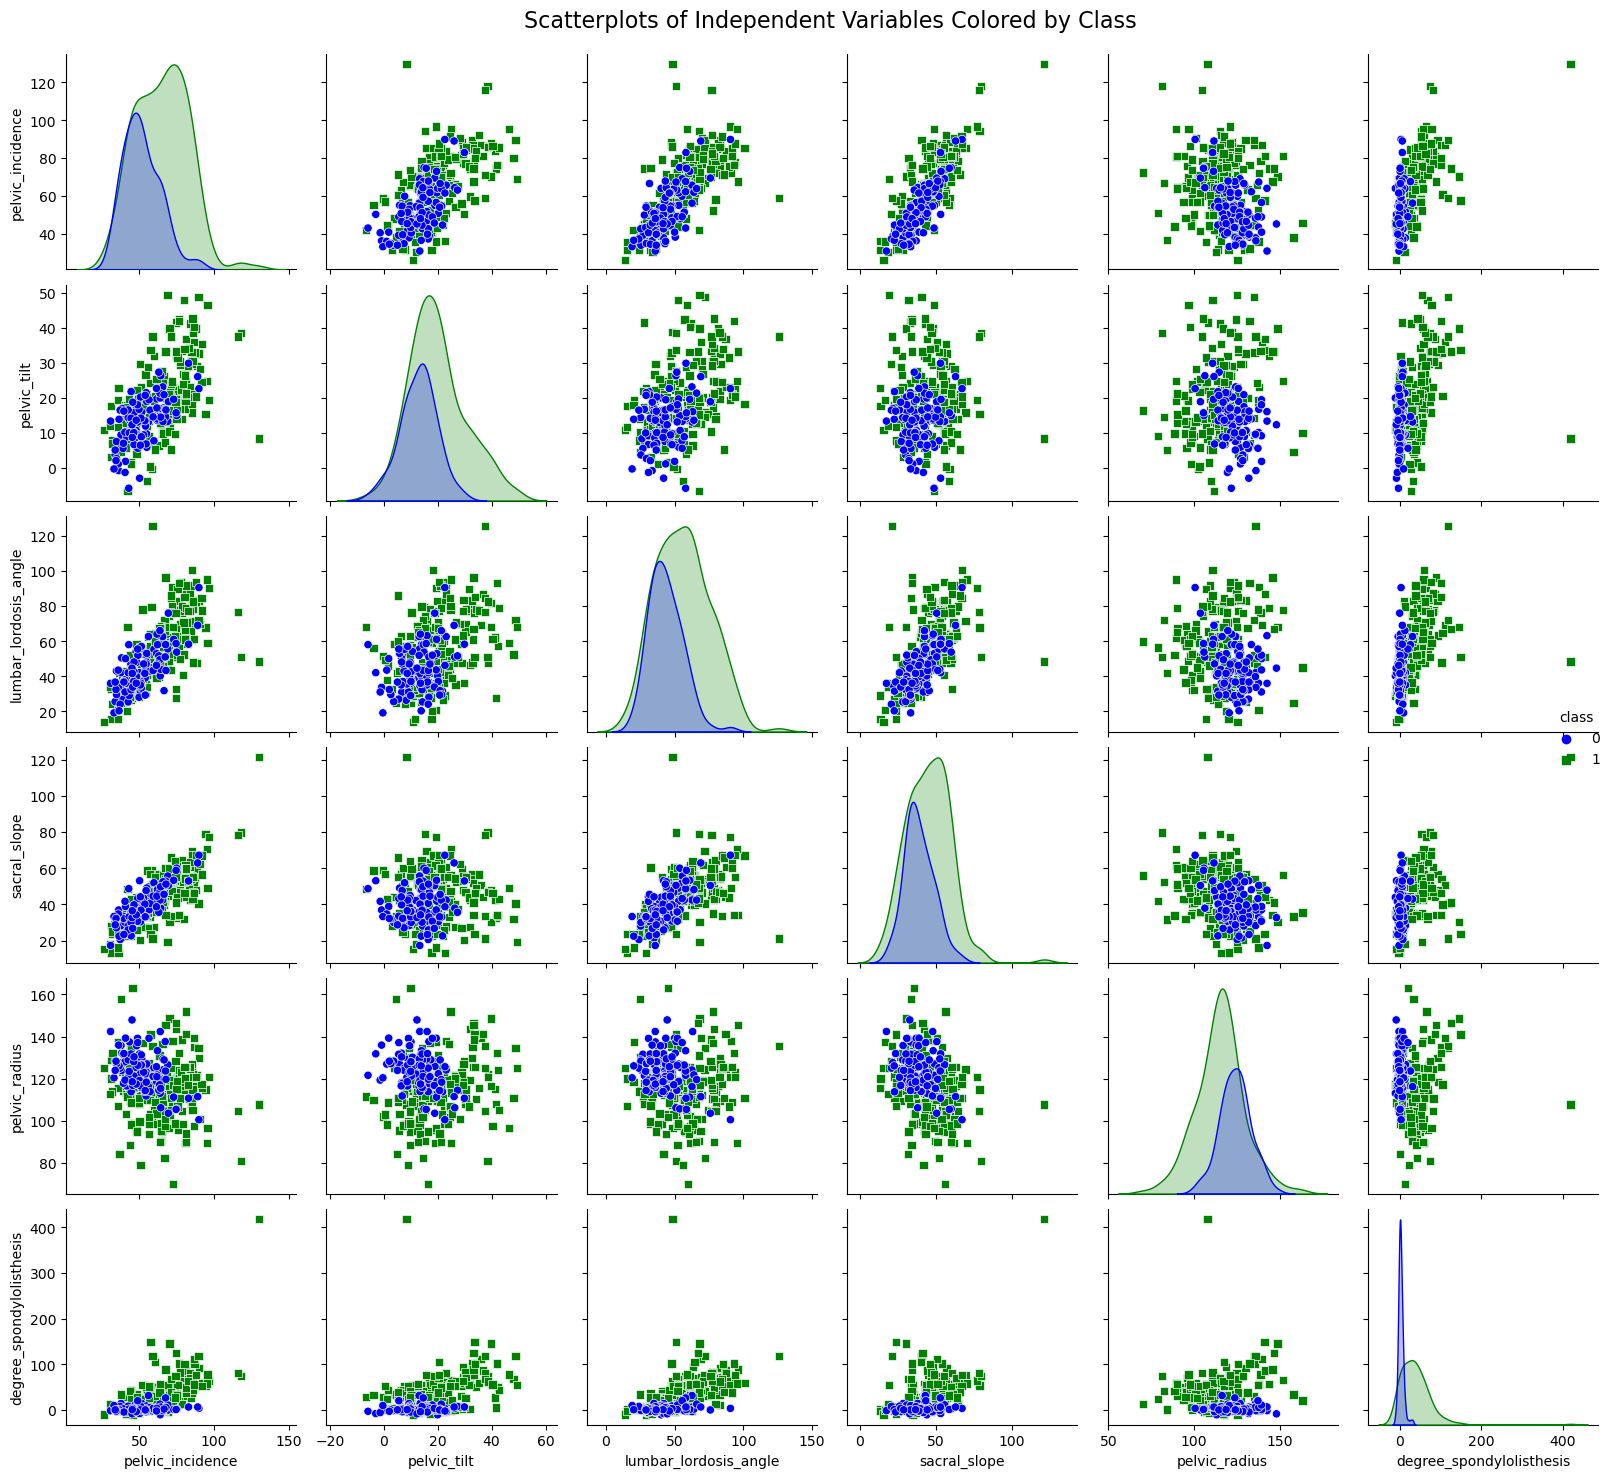

In [111]:
#Normal = 0 / Abnormal = 1 
df['class'] = df['class'].replace([b'Abnormal'], 1)
df['class'] = df['class'].replace([b'Normal'], 0) 

#using different colors for the class
palette = {0: 'blue', 1: 'green'}
plot = sns.pairplot(df, hue='class', markers=["o", "s"], palette=palette)

#subtitle of the plot 
plot.fig.suptitle('Scatterplots of Independent Variables Colored by Class', fontsize=16)
plot.fig.tight_layout(pad=0.8) #reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html
plot.fig.subplots_adjust(top=0.95, left=0.01)
plt.show()

#### ii. Boxplots

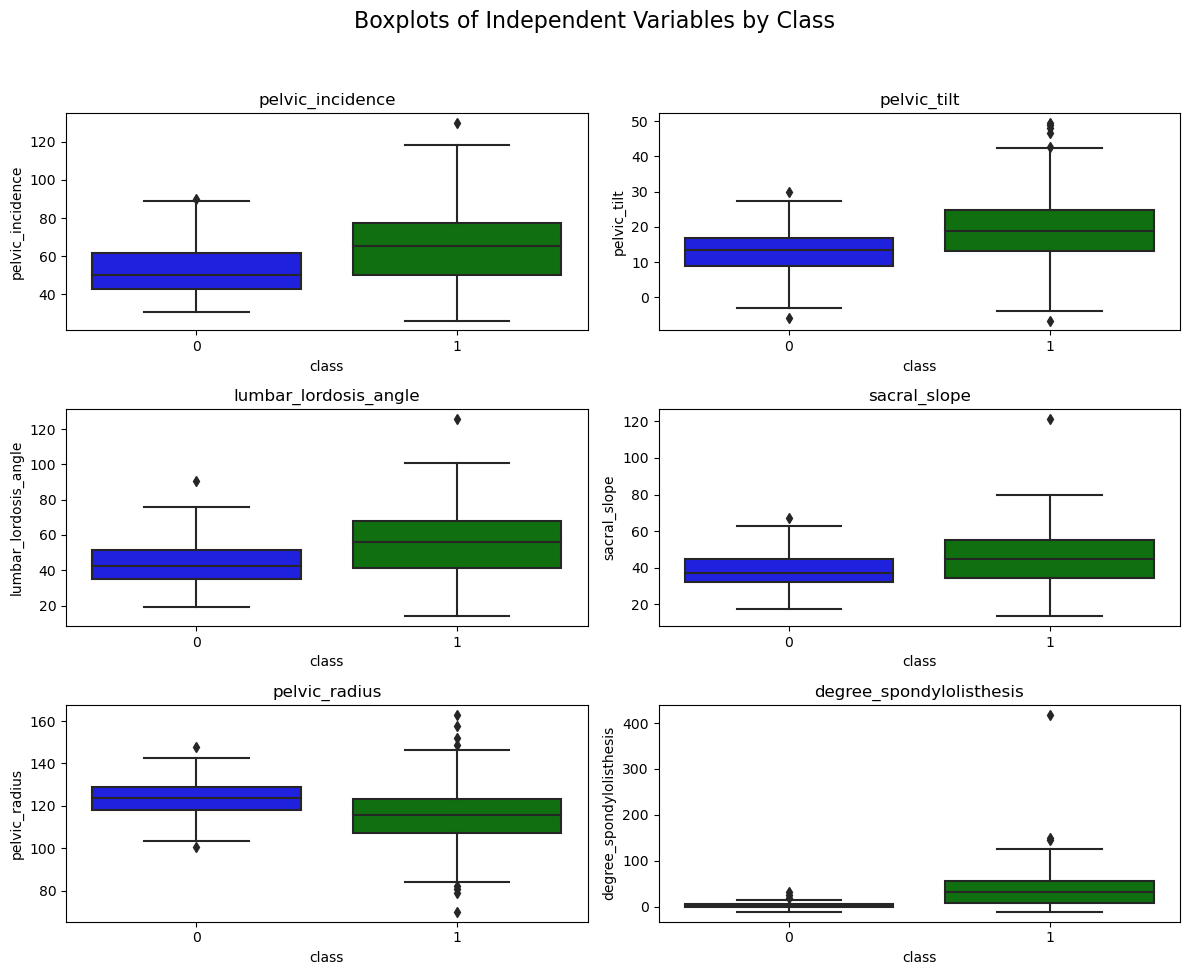

In [112]:
# Create boxplots for each independent variable, colored by class
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
fig.suptitle('Boxplots of Independent Variables by Class', fontsize=16)

#list of independent variables
independent_vars = ["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle", "sacral_slope", "pelvic_radius", "degree_spondylolisthesis"]

# Iterate over each variable to create a boxplot
for i, var in enumerate(independent_vars):
    row = i // 2
    col = i % 2
    sns.boxplot(x="class", y=var, data=df, ax=axes[row, col], palette={0: 'blue', 1: 'green'})
    axes[row, col].set_title(var)

plt.tight_layout(rect=[0, 0.01, 1, 0.95])
plt.show()

#### iii. Split Data Set

In [113]:
from sklearn.model_selection import train_test_split

# Correctly selecting 70 rows for the train set of class 0
train_class_0 = df.loc[df["class"] == 0][:70]
# The rest for the test set
test_class_0 = df.loc[df["class"] == 0][70:]

# Correctly selecting 140 rows for the train set of class 1
train_class_1 = df.loc[df["class"] == 1][:140]
# The rest for the test set
test_class_1 = df.loc[df["class"] == 1][140:]

# Combine train sets
train_data = pd.concat([train_class_0, train_class_1])

# Combine test sets
test_data = pd.concat([test_class_0, test_class_1])

#debugging for checking 
# print(train_data.shape)  # Should be (210, 7) -> 70 from class 0 + 140 from class 1
# print(test_data.shape)   # Should be (100, 7) -> Remaining from class 0 and class 1

combined_data = pd.concat([train_data, test_data])

#chatgpt (used prompt: split the training and testing data into x and target label y)
X = combined_data.iloc[:, :-1]
y = combined_data.iloc[:, -1]

# Split into train and test sets / ref from hw 0 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### (c) Classification

#### i. Euclidean Metric

In [114]:
#software package, referencing from chatgpt 
#(used prompt: what is the software package for k-nearest neighbors with Euclidean metric?)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a k-NN classifier with Euclidean distance
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
#train x and y  
knn.fit(x_train, y_train)
# citing from: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score
# # Make predictions on the test set
y_pred = knn.predict(x_test)
# # Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy of kNN with Euclidean metric: {accuracy:.2f}')

Accuracy of kNN with Euclidean metric: 0.85


#### ii. Test Data

Plotting training and testing errors in terms of k

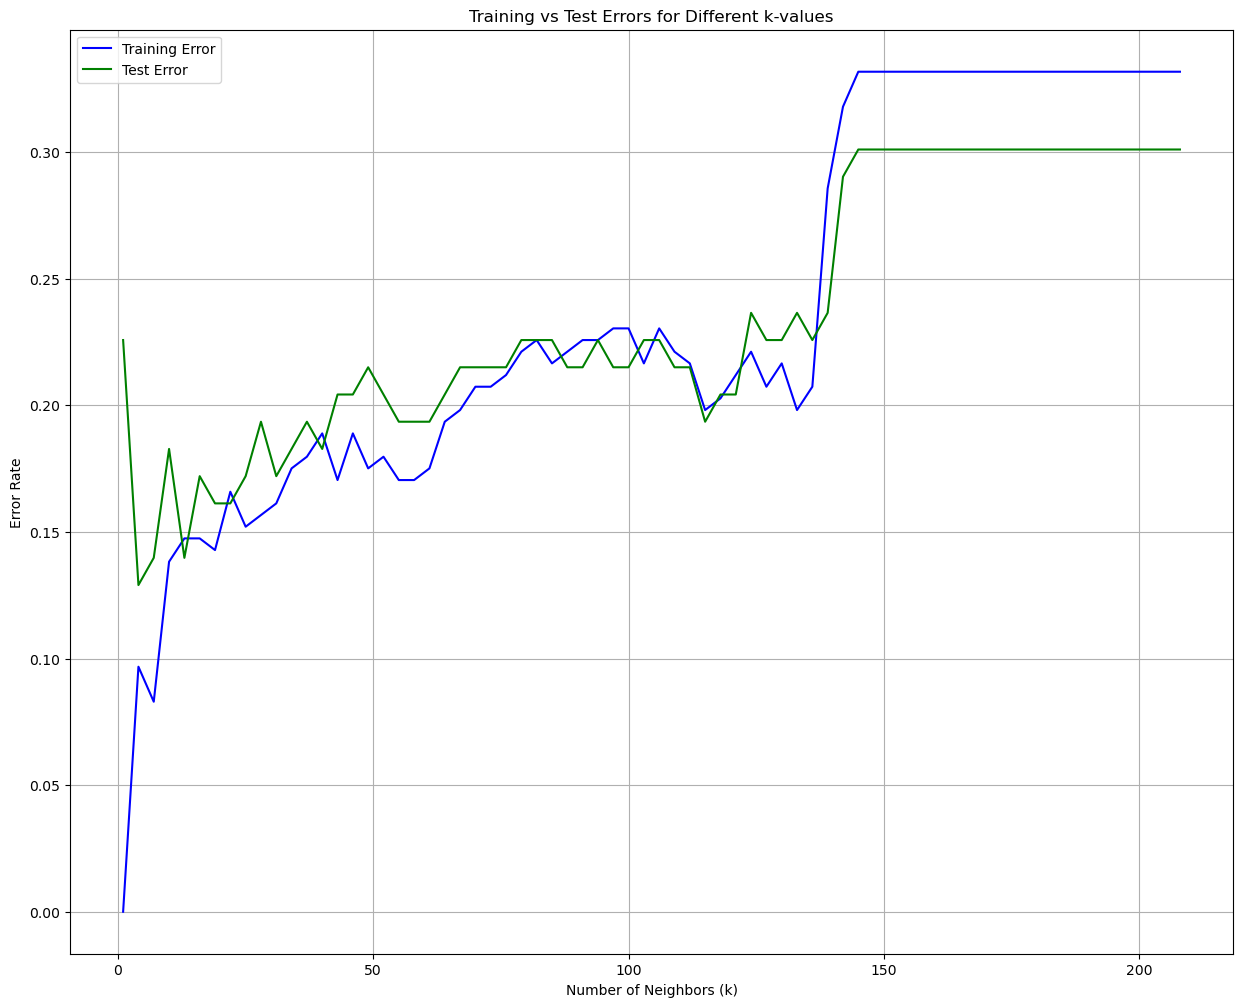

In [115]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

#init for errors 
test_err = []
train_err = []
k_val = range(208, 0, -3) #given (208, 205, ..., 1) decrements by 3, k_val index not changed 

for k in k_val: 
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(x_train, y_train) #train x and y 
    
    y_pred_train = knn.predict(x_train)
    y_pred_test = knn.predict(x_test) 
    
    #calculating the train errors 
    train_error = 1 - accuracy_score(y_train, y_pred_train)
    train_err.append(train_error)
    
    #calculating the train errors 
    test_error = 1 - accuracy_score(y_test, y_pred_test)
    test_err.append(test_error)
    
plt.figure(figsize=(15, 12))
plt.plot(k_val, train_err, label='Training Error', color='blue')
plt.plot(k_val, test_err, label='Test Error', color='green')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.title('Training vs Test Errors for Different k-values')
plt.legend()
plt.grid()
plt.show()

Finding most suitable k value (confusion matrix, true positive rate, true neg, precision, and F1-score)

In [116]:
from sklearn.metrics import confusion_matrix, precision_score

knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn.fit(x_train, y_train) #train x and y 
y_pred_test = knn.predict(x_test) 

conf_matrix = confusion_matrix(y_test, y_pred_test)
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
tn, fp, fn, tp = conf_matrix.ravel()
#finding true pos rate 
tpr = tp / (tp + fn)
#true neg rate 
tnr = tn / (tn + fp)
prec_score = precision_score(y_test, y_pred_test)
#following the f1 score formula 
f1 = 2 * (prec_score * tpr) / (prec_score + tpr)

#print values 
print('Confusion Matrix:')
print(conf_matrix)
print(f'True Positive Rate (TPR): {tpr:.2f}')
print(f'True Negative Rate (TNR): {tnr:.2f}')
print(f'Precision: {prec_score:.2f}')
print(f'F1-Score: {f1:.2f}')

Confusion Matrix:
[[19  9]
 [12 53]]
True Positive Rate (TPR): 0.82
True Negative Rate (TNR): 0.68
Precision: 0.85
F1-Score: 0.83


#### iii. Learning Curve

╒══════════╤══════════════╕
│   Best k │   Test Error │
╞══════════╪══════════════╡
│        1 │    0.0430108 │
╘══════════╧══════════════╛


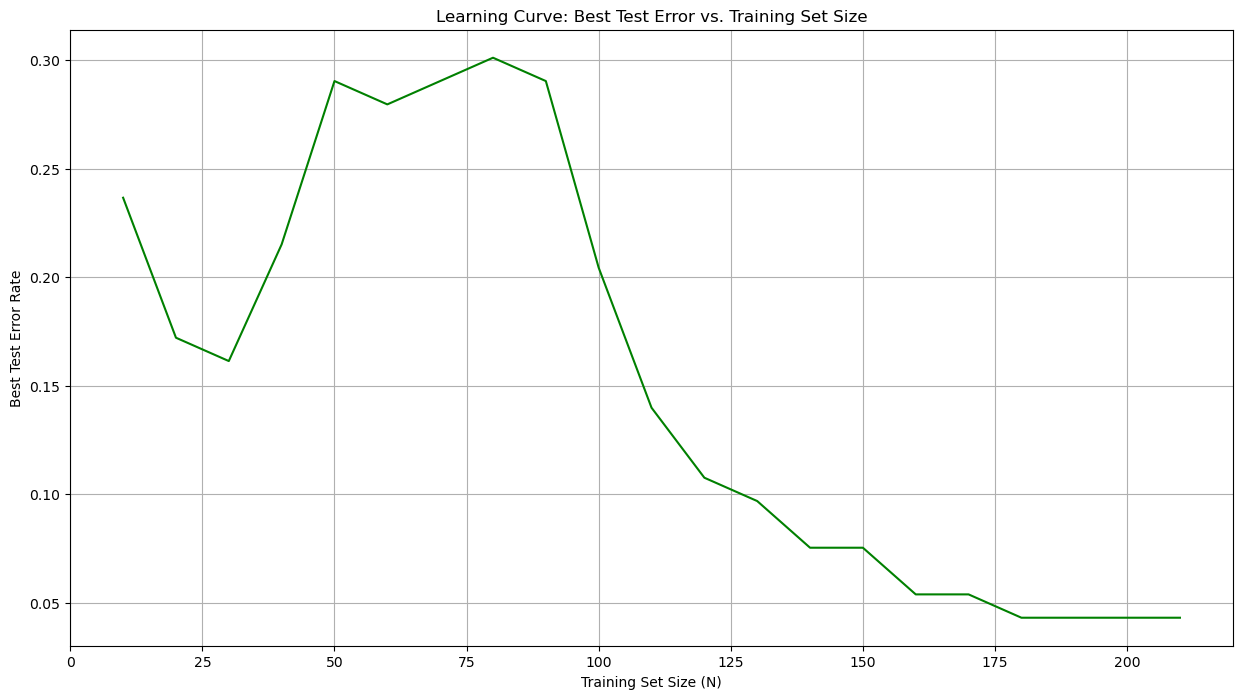

In [117]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize lists to store the results
train_sizes = range(10, 211, 10)  # N ∈ {10, 20, 30, ..., 210}
best_test_errors = []
results = []

# Iterate over different training set sizes
for N in train_sizes:
    # init class 0 and 1 
    class_0 = N//3 #first ⌊N/3⌋ rows
    class_1 = N - class_0 #N − ⌊N/3⌋
    
    #subset of traning set 
    train_sub_class_0 = df.loc[df['class']==0][:class_0]
    train_sub_class_1 = df.loc[df['class']==1][:class_1]
    train_subset = pd.concat([train_sub_class_0, train_sub_class_1]) #combine 
    
    #seperate features 
    x_train = train_subset.iloc[:, :-1]
    y_train = train_subset.iloc[:, -1]

    # Initialize min_test_errr and k_best for comparison 
    min_test_err = float('inf')
    
    # k_val incremenet by 5
    k_vals = range(1, N, 5)
    for k in k_vals:
        knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean') #recalling from above
        knn.fit(x_train, y_train) #train data 
        
        # Calculate test error to find the best test error 
        test_err = 1 - knn.score(x_test, y_test)
        # Check if this is the best k for the current N
        if test_err < min_test_err:
            min_test_err = test_err
            best_k = k
    
    # Store the best test error for this training set size
    best_test_errors.append(min_test_err)
    
results.append([best_k, min_test_err])
print(tabulate(results, headers=['Best k', 'Test Error'], tablefmt='fancy_grid'))

# Plot the learning curve
plt.figure(figsize=(15, 8))
plt.plot(train_sizes, best_test_errors, color='green')
plt.xlabel('Training Set Size (N)')
plt.ylabel('Best Test Error Rate')
plt.title('Learning Curve: Best Test Error vs. Training Set Size')
plt.grid()
plt.show()

### (d) Other Metrics

#### i. Minkowski Distance.

##### A. Manhattan Distance with p = 1.

In [118]:
from sklearn.neighbors import KNeighborsClassifier
from tabulate import tabulate

#applying the same initialization from above
min_test_err = float('inf')
best_k = 1
results = []

k_vals = range(1, 197, 5) #increment by 5 
for k in k_vals:
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan', p=1) #replaced euclidean with minkowski and p=1
    knn.fit(x_train, y_train)
    
    #calculate the test error 
    test_err = 1 - knn.score(x_test, y_test)
    #check 
    if test_err < min_test_err:
        min_test_err = test_err
        best_k = k
        
results.append([best_k, min_test_err])
print(tabulate(results, headers=['Best k', 'Test Error'], tablefmt='fancy_grid'))

╒══════════╤══════════════╕
│   Best k │   Test Error │
╞══════════╪══════════════╡
│        1 │    0.0322581 │
╘══════════╧══════════════╛


best k = 1, will use this value for part b.

##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

In [119]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from tabulate import tabulate

#applying the same initialization from above
min_test_err = float('inf')
best_k = 1 #different k value, using 11 in this case 
results = []
best_log_10 = None 
best_p = None 

#to iterate from 0.1, 0.2, ..., 1 using numpy.arrange 
#chatgpt prompt: how to terate over log10(p) values from 0.1, 0.2, 0.3 to 1?
log10p_vals = np.arange(0.1, 1.1, 0.1) #increment by 0.1 
for logp in log10p_vals:
    #define p 
    new_p = 10 ** logp
    knn = KNeighborsClassifier(n_neighbors=best_k, metric='minkowski', p=new_p) #converting log10(p) to p / using manhatthan distance k value 
    knn.fit(x_train, y_train)
    test_err = 1 - knn.score(x_test, y_test)
    test_errors.append(test_err)
    
    # Check if this is the best log10(p)
    if test_err < min_test_err:
        min_test_err = test_err
        best_log_10 = logp
        best_p = p

#add to reuslts to display 
results.append([best_k, best_log_10, best_p, min_test_err])  
print(tabulate(results, headers=['Best k', 'best log_10(p)', 'best_p', 'Test Error'], tablefmt='fancy_grid'))

╒══════════╤══════════════════╤══════════╤══════════════╕
│   Best k │   best log_10(p) │   best_p │   Test Error │
╞══════════╪══════════════════╪══════════╪══════════════╡
│        1 │              0.7 │       10 │    0.0322581 │
╘══════════╧══════════════════╧══════════╧══════════════╛


##### C. Chebyshev Distance With p -> infinity.

In [124]:
from sklearn.neighbors import KNeighborsClassifier
from tabulate import tabulate
import numpy as np

results = []

best_k = 1
knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=np.inf)
knn.fit(x_train, y_train)

test_accuracy = knn.score(x_test, y_test)
test_error = 1 - test_accuracy

results.append([best_k, test_error])
print(tabulate(results, headers=['Best k', 'Test Error'], tablefmt='fancy_grid'))

╒══════════╤══════════════╕
│   Best k │   Test Error │
╞══════════╪══════════════╡
│        1 │     0.301075 │
╘══════════╧══════════════╛


#### ii. Mahalanobis Distance.

In [125]:
from sklearn.neighbors import KNeighborsClassifier
from tabulate import tabulate
import numpy as np

#applying the same initialization from above
min_test_err = float('inf')
best_k = 1
results = []
#chatgpt prompt: how to find covariance matrix 
# Calculate the covariance matrix of the training data
cov_matrix = np.cov(x_train, rowvar=False)
# Calculate the inverse of the covariance matrix
inv_cov_matrix = np.linalg.inv(cov_matrix)

k_vals = range(1, 197, 5) #increment by 5 
for k in k_vals:
    knn = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis', metric_params={'VI': inv_cov_matrix}) 
    knn.fit(x_train, y_train)
    
    #calculate the test error 
    test_err = 1 - knn.score(x_test, y_test)
    #check 
    if test_err < min_test_err:
        min_test_err = test_err
        best_k = k
        
results.append([best_k, min_test_err])
print(tabulate(results, headers=['Best k', 'Test Error'], tablefmt='fancy_grid'))

╒══════════╤══════════════╕
│   Best k │   Test Error │
╞══════════╪══════════════╡
│        1 │    0.0322581 │
╘══════════╧══════════════╛


In [132]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from tabulate import tabulate

# List of metrics to test / iterating list 
metrics = {
    'Euclidean': {'metric': 'euclidean'},
    'Manhattan': {'metric': 'minkowski', 'p': 1},
    'Chebyshev': {'metric': 'chebyshev'},
    'Mahalanobis': {'metric': 'mahalanobis', 'metric_params': {'VI': inv_cov_matrix}}
}

# Store the results
results = []

# Iterate over each metric
for metric_name, params in metrics.items():
    min_test_err = float('inf')
    best_k = 1
    k_vals = range(1, 197, 5)  # Increment by 5
    
    # Find the best k for the current metric
    for k in k_vals:
        knn = KNeighborsClassifier(n_neighbors=k, **params)
        #print(f'Metric: {metric_name}, k={k}, Test Error: {test_err:.4f}')
        knn.fit(x_train, y_train)
        
        # Calculate the test error
        test_err = 1 - knn.score(x_test, y_test)
        
        # condition added as test_err 0.0 has occured 
        if test_err > 0 and test_err < min_test_err:
            min_test_err = test_err
            best_k = k

    # Append the results for the current metric
    results.append([metric_name, best_k, min_test_err])

# Summarize the results in a table
print(tabulate(results, headers=['Metric', 'Best k', 'Test Error'], tablefmt='fancy_grid'))

╒═════════════╤══════════╤══════════════╕
│ Metric      │   Best k │   Test Error │
╞═════════════╪══════════╪══════════════╡
│ Euclidean   │        1 │    0.0430108 │
├─────────────┼──────────┼──────────────┤
│ Manhattan   │        1 │    0.0322581 │
├─────────────┼──────────┼──────────────┤
│ Chebyshev   │        1 │    0.0430108 │
├─────────────┼──────────┼──────────────┤
│ Mahalanobis │        1 │    0.0322581 │
╘═════════════╧══════════╧══════════════╛


### (e) Weighted Decision

In [130]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from tabulate import tabulate

# List of metrics to test / iterating list 
metrics = {
    'Euclidean': {'metric': 'euclidean'},
    'Manhattan': {'metric': 'manhattan'},
    'Chebyshev': {'metric': 'chebyshev'}
}

# Store the results
results = []

# Iterate over each metric
for metric_name, params in metrics.items():
    min_test_err = float('inf')
    best_k = 1
    k_vals = range(1, 197, 5)  # Increment by 5
    
    # Find the best k for the current metric
    for k in k_vals:
        knn = KNeighborsClassifier(n_neighbors=k, weights='distance', **params)
        #print(f'Metric: {metric_name}, k={k}, Test Error: {test_err:.4f}')
        knn.fit(x_train, y_train)
        
        # Calculate the test error
        test_err = 1 - knn.score(x_test, y_test)
        
        # condition added as test_err 0.0 has occured 
        if test_err > 0 and test_err < min_test_err:
            min_test_err = test_err
            best_k = k

    # Append the results for the current metric
    results.append([metric_name, best_k, min_test_err])

# Summarize the results in a table
print(tabulate(results, headers=['Metric', 'Best k', 'Test Error'], tablefmt='fancy_grid'))

╒═══════════╤══════════╤══════════════╕
│ Metric    │   Best k │   Test Error │
╞═══════════╪══════════╪══════════════╡
│ Euclidean │       16 │    0.0107527 │
├───────────┼──────────┼──────────────┤
│ Manhattan │        6 │    0.0107527 │
├───────────┼──────────┼──────────────┤
│ Chebyshev │       11 │    0.0107527 │
╘═══════════╧══════════╧══════════════╛


### (f) Training Error Rate

Reference Lists (have cited used chatgpt prompts under code comments) 

https://scikit-learn.org/stable/modules/model_evaluation.html
https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn
https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
https://stackoverflow.com/questions/9535954/printing-lists-as-tabular-data
https://scikit-learn.org/stable/modules/linear_model.html
https://datascience.stackexchange.com/questions/50847/k-nearest-neighbours-algorithm-explanation-needed
https://scikit-learn.org/stable/modules/model_evaluation.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html
https://stackoverflow.com/questions/50552853/seaborn-boxplot-for-each-variable-of-a-dataset